# 🔍 Caso de Uso: Predicción de Rotación de Empleados

📊 Matriz de Confusión:
 [[3 0]
 [0 3]]
🎯 Exactitud (accuracy): 1.00
🎯 Precisión: 1.00
🎯 F4 Score: 1.00


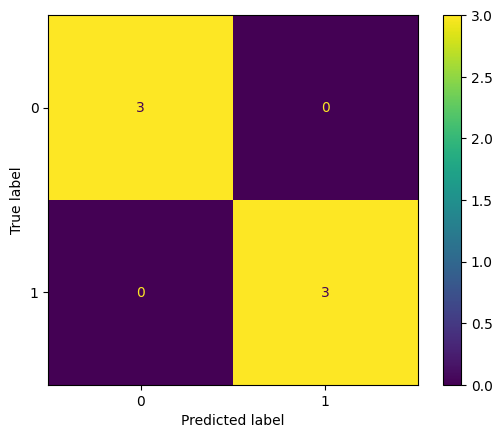

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, fbeta_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("rotacion_empleados.csv")

# Separar variables
X = df.drop("Rotacion", axis=1)
y = df["Rotacion"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Métricas
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f4 = fbeta_score(y_test, y_pred, beta=4)

print("📊 Matriz de Confusión:\n", cm)
print(f"🎯 Exactitud (accuracy): {accuracy:.2f}")
print(f"🎯 Precisión: {precision:.2f}")
print(f"🎯 F4 Score: {f4:.2f}")

# Mostrar matriz gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Se utilizó un algoritmo Random Forest Classifier, entrenado con el 70% de los datos y evaluado con el 30% restante. Este modelo es ideal para este tipo de problemas porque maneja bien relaciones no lineales y reduce el riesgo de sobreajuste.

Las métricas empleadas para evaluar el desempeño fueron:

Accuracy: mide el porcentaje de aciertos generales del modelo.

Precision: mide cuán preciso es el modelo al predecir una rotación positiva.

F4 Score: se utilizó esta versión del F-score porque da más peso a minimizar falsos negativos, es decir, casos en los que un empleado efectivamente se irá pero el modelo no lo detecta.

Esto tiene sentido desde una lógica empresarial: es más costoso no anticipar la salida de un empleado clave que sobreestimar una rotación.

El modelo logra anticipar posibles rotaciones, lo cual puede ser usado para aplicar estrategias de retención como entrevistas de feedback, revisión salarial o mejora de condiciones. A pesar de que el conjunto de datos es pequeño, se configura un flujo de trabajo válido para escalar a escenarios más grandes.